# Assignment 4. Basics of neural networks
## General Assignment

Before performing the practical work, you need download the data set accordingly to the option on your machine
1. Write a program that splits the original sample into a training set and a test set (training set, validation set, test set)
2. Build a model using Perceptron (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) and MLPClassifier (http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). On the basis of experiments, select values for learning rate, the regularization parameter, the optimization function.
3. Build learning curves for better explanation of your experiments.

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


# load seeds_dataset.tsv
seeds = pd.read_csv('./seeds_dataset.csv', sep=',')

# split into x and y
x = seeds.iloc[:, :-1]
y = seeds.iloc[:, -1]

# split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=8)

In [25]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score

# build a model with Perceptron using train data
model = Perceptron(random_state=8)
model.fit(x_train, y_train)

prediction = model.predict(x_test)

# f1 score
f1_score(y_test, prediction, average='macro')

0.7797049441786283

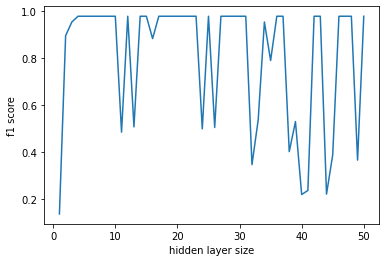

4


In [39]:
# MLPClassifier
from sklearn.neural_network import MLPClassifier

# lin space from 1 to 1000
hidden_layer_sizes = np.linspace(1, 50, 100).astype(int)
scores = []
for size in hidden_layer_sizes:
    model = MLPClassifier(hidden_layer_sizes=size, random_state=8, max_iter=10000)
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    scores.append(f1_score(y_test, prediction, average='macro'))

# plot
import matplotlib.pyplot as plt

# plot the scores
plt.plot(hidden_layer_sizes, scores)
plt.xlabel('hidden layer size')
plt.ylabel('f1 score')
plt.show()

print(hidden_layer_sizes[np.argmax(scores)])



In [ ]:
# test different solvers for our MLPClassifier

solvers = ['lbfgs', 'sgd', 'adam']
